In [23]:
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.19.0


In [38]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping

Animal Classes: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


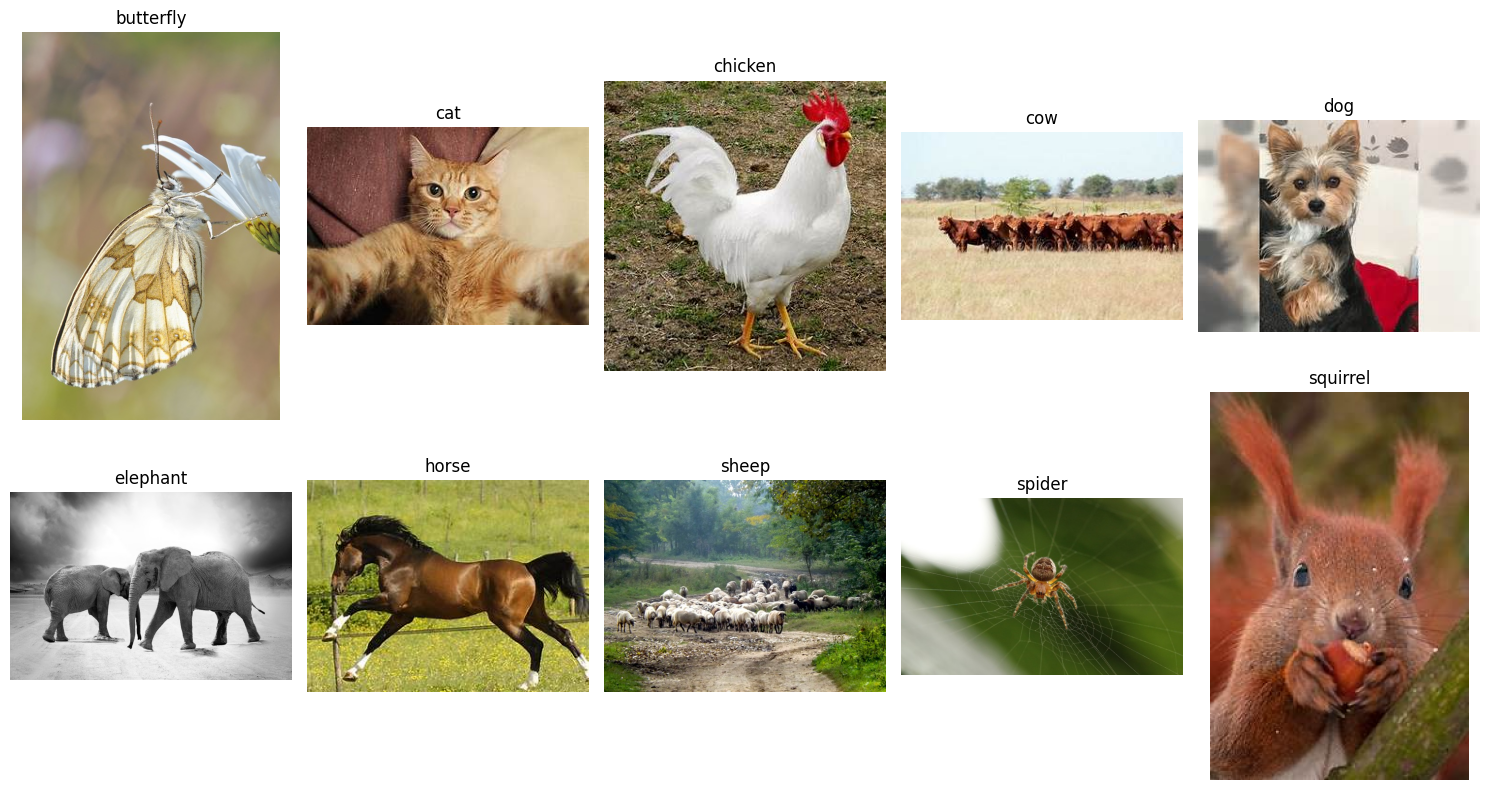

In [39]:
import os
import matplotlib.pyplot as plt
from PIL import Image

dataset_path = r'C:\Users\samal\Downloads\CV\raw-img'

animal_classes = os.listdir(dataset_path)
print("Animal Classes:", animal_classes)

plt.figure(figsize=(15, 8))
for i, animal in enumerate(animal_classes[:10]):  # Show first 10 animals
    img_path = os.path.join(dataset_path, animal, os.listdir(os.path.join(dataset_path, animal))[0])
    img = Image.open(img_path)
    
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(animal)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [40]:
dataset_path = r'C:\Users\samal\Downloads\CV\raw-img'
target_size = (224, 224)  # Standard size for most models
batch_size = 32

class_names = sorted(os.listdir(dataset_path))
print("English Names:", class_names)

images = []
labels = []

for class_idx, class_name in enumerate(class_names):
    class_dir = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_dir)[:1000]:  
        img_path = os.path.join(class_dir, img_name)
        try:
            img = Image.open(img_path).convert('RGB')
            img = img.resize(target_size)
            images.append(np.array(img))
            labels.append(class_idx)
        except:
            print(f"Skipped corrupt image: {img_path}")

English Names: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
Skipped corrupt image: C:\Users\samal\Downloads\CV\raw-img\dog\OIP-3m5LC4ldwBSF22GQicHrXgHaLH.jpeg


In [41]:
images = np.array(images)
labels = np.array(labels)

images = images / 255.0

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print("\nDataset Summary:")
print(f"Total images: {len(images)}")
print(f"Training set: {X_train.shape[0]} images")
print(f"Validation set: {X_val.shape[0]} images")
print(f"Image shape: {X_train.shape[1:]}")




Dataset Summary:
Total images: 9999
Training set: 7999 images
Validation set: 2000 images
Image shape: (224, 224, 3)


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop]
)

model.save('animal_classifier.h5')

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.7870 - loss: 0.6837 - val_accuracy: 0.9390 - val_loss: 0.1979
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.9428 - loss: 0.1823 - val_accuracy: 0.9340 - val_loss: 0.2060
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.9586 - loss: 0.1324 - val_accuracy: 0.9405 - val_loss: 0.1896
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - accuracy: 0.9621 - loss: 0.1091 - val_accuracy: 0.9465 - val_loss: 0.1882
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 311s 1s/step - accuracy: 0.9729 - loss: 0.0924 - val_accuracy: 0.9450 - val_loss: 0.1939
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 302s 1s/step - accuracy: 0.9757 - loss: 0.0778 - val_accuracy: 0.9495 - val_loss: 0.1818
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - accuracy: 0.9754 - loss: 0.0679 - val_accuracy: 0.9470 - val_loss: 0.1944
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/

63/63 - 52s - 822ms/step - accuracy: 0.9495 - loss: 0.1818

Validation Accuracy: 94.95%


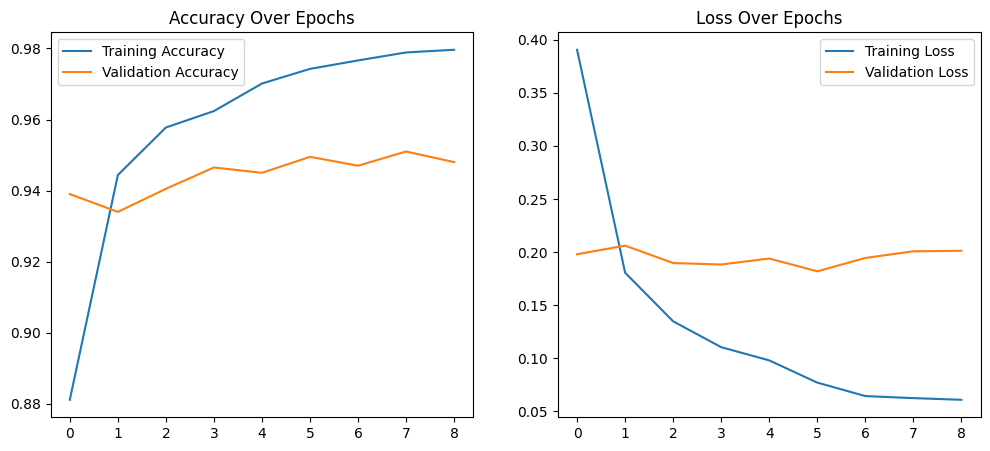

In [33]:
# Evaluate
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=2)
print(f"\nValidation Accuracy: {test_acc:.2%}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


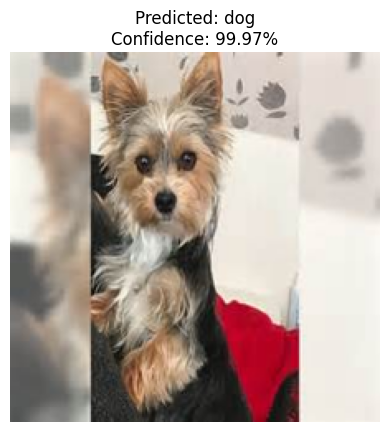

('dog', np.float32(99.970665))

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

model = tf.keras.models.load_model('animal_classifier.h5')

class_names = ['butterfly', 'cat', 'chicken', 'cow', 'dog', 
               'elephant', 'horse', 'sheep', 'spider', 'squirrel']

def predict_animal(image_path):
    img = Image.open(image_path).convert('RGB').resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions) * 100
    
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()
    
    return predicted_class, confidence

predict_animal(r'C:\Users\samal\Downloads\CV\raw-img\dog\OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg')  # Replace with your image path

In [35]:
import sys
sys.executable


'c:\\Users\\samal\\AppData\\Local\\Programs\\Python\\Python311\\python.exe'